In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [3]:
topk = pd.read_csv("efficiency-topk.csv")
switch = pd.read_csv("efficiency-switch.csv")

In [4]:
#topk = topk[['Step', 'royal-water-4 - AutoEncoderTopK-0/l2_loss']] ## k = 128
topk = topk[['Step', 'vivid-bee-2 - AutoEncoderTopK-0/l2_loss']] ## k = 64
#topk = topk[['Step', 'still-river-1 - AutoEncoderTopK-0/l2_loss']] ## k = 32
#topk = topk[['Step', 'drawn-voice-3 - AutoEncoderTopK-0/l2_loss']] ## k = 8

topk.columns = ['step', 'loss']

In [5]:
switch2lb = switch[['Step', 'swift-bush-9 - SwitchAutoEncoder-1/l2_loss']] ## k = 64
#switch2lb = switch[['Step', 'restful-pond-10 - SwitchAutoEncoder-0/l2_loss']] ## k = 128

switch2lb.columns = ['step', 'loss']

In [6]:
switch4lb = switch[['Step', 'vague-bee-2 - SwitchAutoEncoder-0/l2_loss']] ## k = 64
#switch4lb = switch[['Step', 'vague-bee-2 - SwitchAutoEncoder-1/l2_loss']] ## k = 128

switch4lb.columns = ['step', 'loss']

In [7]:
switch8lb = switch[['Step', 'sandy-bush-4 - SwitchAutoEncoder-0/l2_loss']] ## k = 64
#switch8lb = switch[['Step', 'sandy-bush-4 - SwitchAutoEncoder-1/l2_loss']] ## k = 128

switch8lb.columns = ['step', 'loss']

In [8]:
switch16lb = switch[['Step', 'graceful-bush-15 - SwitchAutoEncoder-0/l2_loss']] ## k = 64

switch16lb.columns = ['step', 'loss']

In [9]:
switch32lb = switch[['Step', 'confused-universe-16 - SwitchAutoEncoder-0/l2_loss']] ## k = 64

switch32lb.columns = ['step', 'loss']

In [1]:
start = 2_000
end = 100_000

In [10]:
topk = topk[(topk['step'] > (start - 1)) & (topk['step'] <= end)]
switch2lb = switch2lb[(switch2lb['step'] > (start - 1)) & (switch2lb['step'] <= end)]
switch4lb = switch4lb[(switch4lb['step'] > (start - 1)) & (switch4lb['step'] <= end)]
switch8lb = switch8lb[(switch8lb['step'] > (start - 1)) & (switch8lb['step'] <= end)]
switch16lb = switch16lb[(switch16lb['step'] > (4 * start - 1)) & (switch16lb['step'] <= 4 * end)]
switch32lb = switch32lb[(switch32lb['step'] > (4 * start - 1)) & (switch32lb['step'] <= 4 * end)]

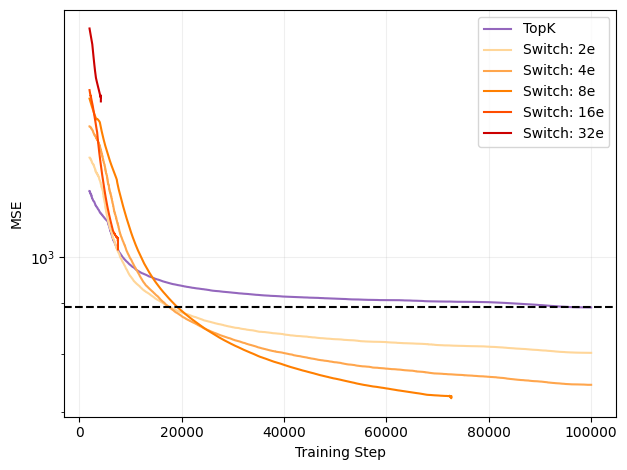

In [12]:
topk_smooth = pd.Series(topk['loss']).rolling(window=4000, center=True, min_periods=1).mean()
switch2lb_smooth = pd.Series(switch2lb['loss']).rolling(window=4000, center=True, min_periods=1).mean()
switch4lb_smooth = pd.Series(switch4lb['loss']).rolling(window=4000, center=True, min_periods=1).mean()
switch8lb_smooth = pd.Series(switch8lb['loss']).rolling(window=4000, center=True, min_periods=1).mean()
switch16lb_smooth = pd.Series(switch16lb['loss']).rolling(window=4000, center=True, min_periods=1).mean()
switch32lb_smooth = pd.Series(switch32lb['loss']).rolling(window=4000, center=True, min_periods=1).mean()

plt.plot(topk['step'], topk_smooth, label='TopK',  color='#9467bd')
plt.plot(switch2lb['step'], switch2lb_smooth, label='Switch: 2e',  color='#FFD699')
plt.plot(switch4lb['step'], switch4lb_smooth, label='Switch: 4e',  color='#FFA64D')
plt.plot(switch8lb['step'], switch8lb_smooth, label='Switch: 8e',  color='#FF7F00')
plt.plot(switch16lb['step'] / 4, switch16lb_smooth, label='Switch: 16e',  color='#FF4D00')
plt.plot(switch32lb['step'] / 4, switch32lb_smooth, label='Switch: 32e',  color='#CC0000')

plt.axhline(y=list(topk_smooth)[-1], color='k', linestyle='--')

#plt.xscale('log')
plt.yscale('log')

plt.xlabel("Training Step")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)

plt.tight_layout()
plt.savefig("efficiency.png")
plt.show()